<a href="https://colab.research.google.com/github/Kai-ChengTsou/AquaCheck/blob/Varsha/MultiFreqBIAWeekTest_Varsha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy import signal
from sklearn.neighbors import KernelDensity

In [ ]:
# Define the parent directory where the folders are located
parent_directory = '/content/drive/MyDrive/AquaCheck/Multi-Frequency-Week-Test'

# List of frequencies corresponding to the filenames
frequencies = [1, 4, 8, 16, 32, 50, 64, 128, 256]

# List of subjects
subjects = ['Varsha']

# List of days of the week
days_of_week = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

# List of hydration states
hydration_states = ['Hydrated', 'Dehydrated']

# Initialize a list to hold the table data
table_data = []

# Iterate through each subject
for subject in subjects:
    # Iterate through each day of the week
    for day in days_of_week:
        # Iterate through each hydration state
        for hydration_state in hydration_states:
            # Iterate through each frequency
            for freq in frequencies:
                file_extensions = ['khz', 'kHz']  # List of file extensions to check
                file_found = False

                for ext in file_extensions:
                    file_name = f'{freq}{ext}.csv'  # Construct the file name

                    file_path = os.path.join(parent_directory, subject, day, hydration_state, file_name)
                    #print("Checking file path:", file_path)  # Debugging: Print the file path for verification

                    if os.path.isfile(file_path):
                        file_found = True
                        #print(f"File found for {subject}, {day}, {hydration_state}, {freq} kHz.")  # Debug message

                        # Read the CSV file
                        df = pd.read_csv(file_path)
                        df = df[30:-30]  # Exclude some rows as needed

                        # Extract I and Q values from the 3rd and 4th columns, respectively
                        I_values = df.iloc[:, 2].values  # 3rd column
                        Q_values = df.iloc[:, 3].values  # 4th column

                        # Multiply each value by 0.00662 to obtain value in ohms
                        I_values = I_values.astype(float) * 0.00662
                        Q_values = Q_values.astype(float) * 0.00662

                        # Applying Butterworth filter and calculating KDE
                        b, a = signal.butter(3, 0.02)
                        I_filtered = signal.filtfilt(b, a, I_values)
                        Q_filtered = signal.filtfilt(b, a, Q_values)

                        kdeI = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(np.array(I_filtered).reshape(-1, 1))
                        densityI = kdeI.score_samples(np.array(I_filtered).reshape(-1, 1))

                        kdeQ = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(np.array(Q_filtered).reshape(-1, 1))
                        densityQ = kdeQ.score_samples(np.array(Q_filtered).reshape(-1, 1))

                        R = I_filtered[np.argmax(densityI)]
                        Xc = Q_filtered[np.argmax(densityQ)]
                        Z = np.sqrt(np.square(Xc) + np.square(R))
                        Pha = np.rad2deg(np.arctan2(Xc, R))

                        # Append the data to the table
                        table_data.append([day, freq, hydration_state, R, Xc, Z, Pha])
                        break
                #if not file_found:
                   # print(f"No file found for {subject}, {day}, {hydration_state}.")

# Create a DataFrame from the table data
df = pd.DataFrame(table_data, columns=['Day', 'Frequency(kHz)', 'Hydration State', 'R(Ohms)', 'Xc(Ohms)', 'Z(Ohms)', 'Pha(Degrees)'])

# Print the table
print(df)

         Day  Frequency(kHz) Hydration State     R(Ohms)    Xc(Ohms)  \
0     Sunday               4        Hydrated  438.105964  -29.695649   
1     Sunday              32        Hydrated  376.403393  -57.432617   
2     Sunday              50        Hydrated  360.665533  -58.824379   
3     Sunday              64        Hydrated  352.073422  -55.377955   
4     Sunday             128        Hydrated  345.719361  -54.140663   
..       ...             ...             ...         ...         ...   
79  Thursday              32      Dehydrated  470.357006  -52.205197   
80  Thursday              50      Dehydrated  448.892865  -59.500980   
81  Thursday              64      Dehydrated  434.749135  -60.370108   
82  Thursday             128      Dehydrated  407.982028  -62.917005   
83  Thursday             256      Dehydrated  448.672969 -103.567353   

       Z(Ohms)  Pha(Degrees)  
0   439.111224     -3.877685  
1   380.759793     -8.675428  
2   365.431163     -9.263350  
3   356.402

In [ ]:
# Save the DataFrame to a CSV file
output_file_path = '/content/drive/MyDrive/AquaCheck/MultiFreqWeekTestBIAData-Varsha.csv'

df.to_csv(output_file_path, index=False)

print("Output table saved to:", output_file_path)

Output table saved to: /content/drive/MyDrive/AquaCheck/MultiFreqWeekTestBIAData-Varsha.csv


<Figure size 1600x800 with 0 Axes>

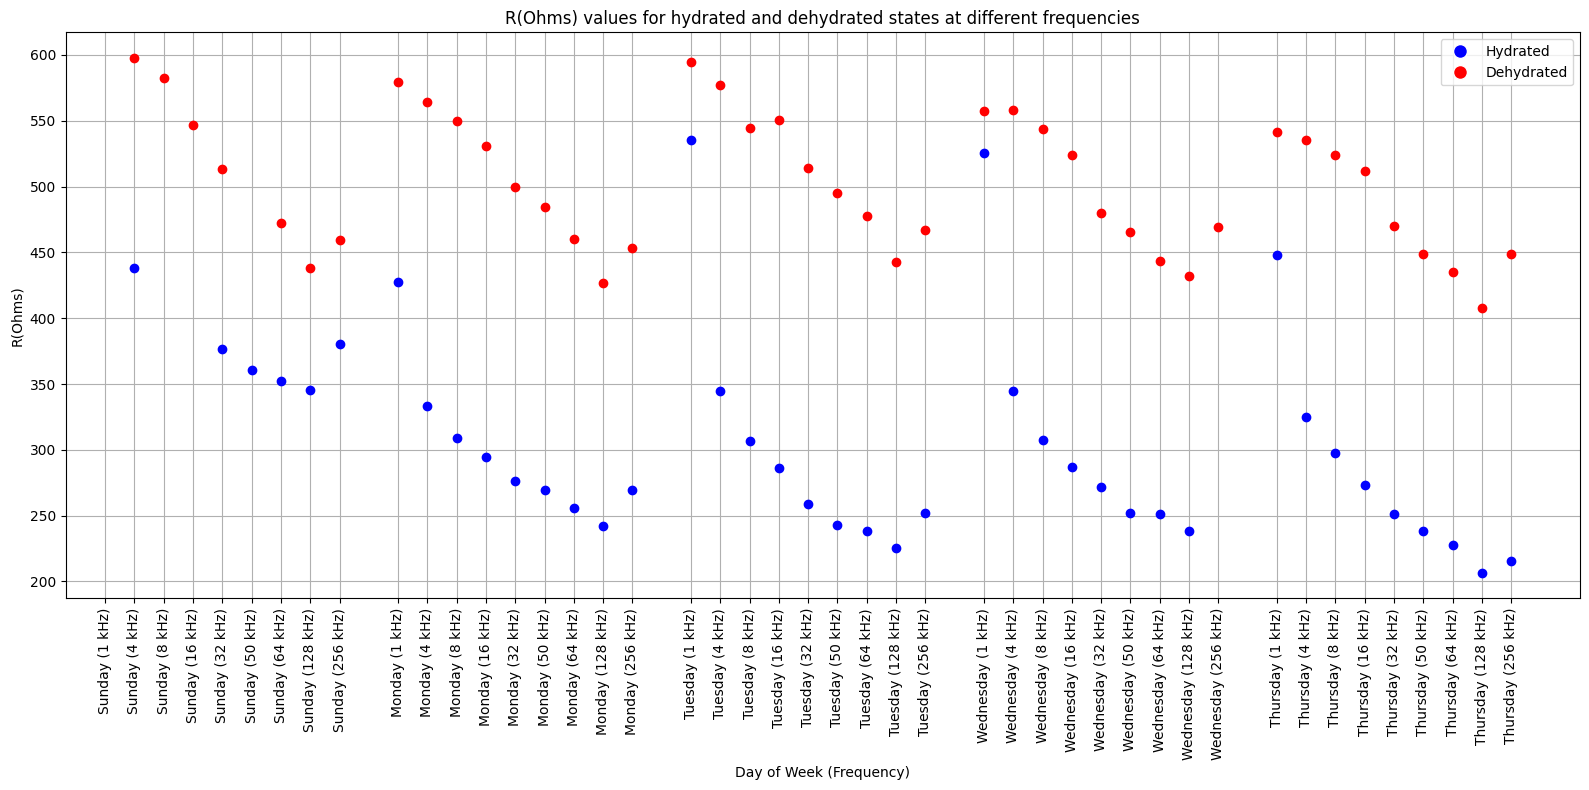

<Figure size 1600x800 with 0 Axes>

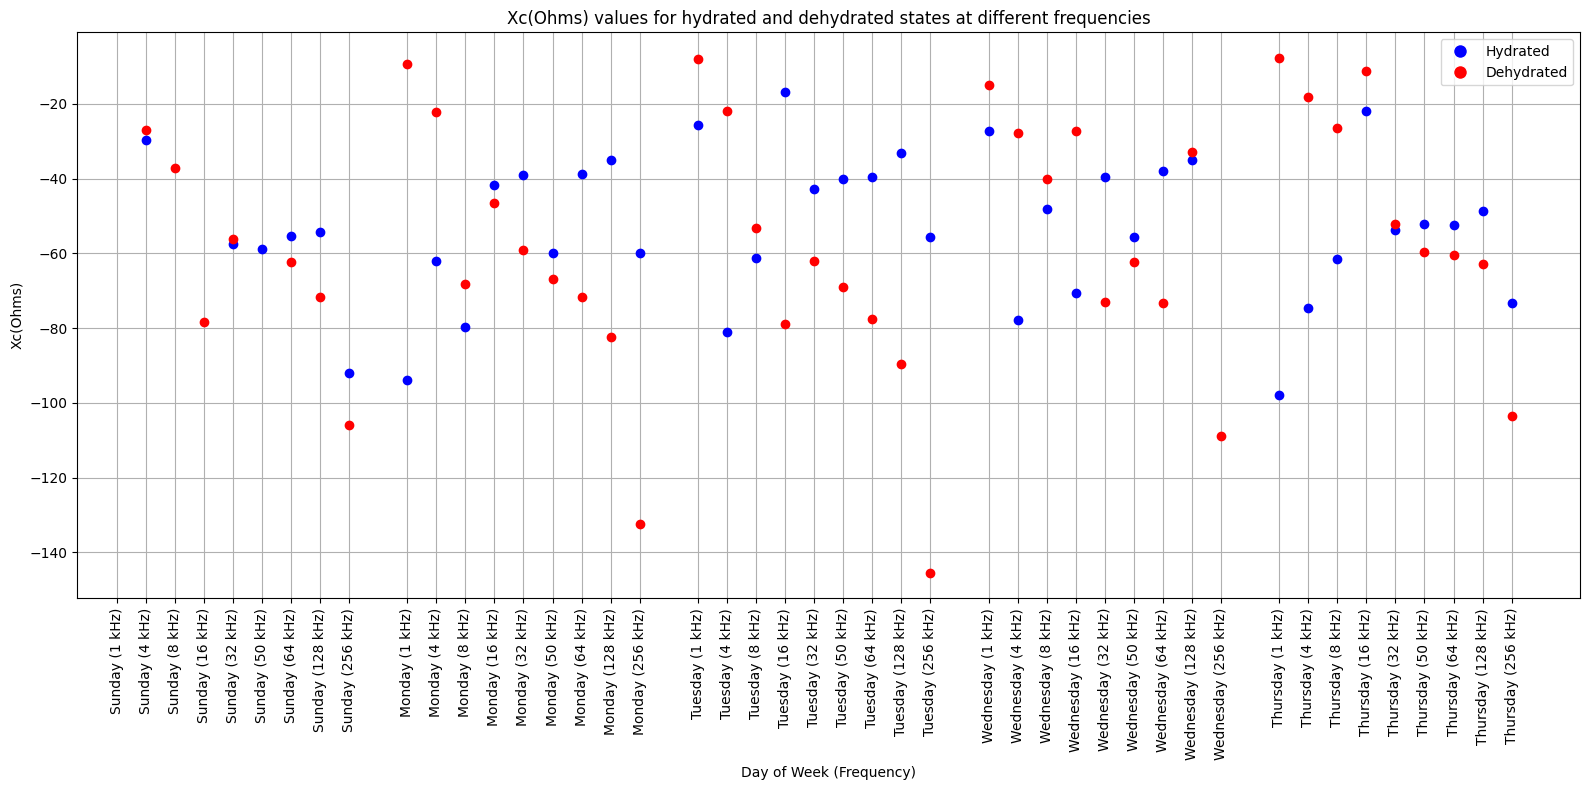

<Figure size 1600x800 with 0 Axes>

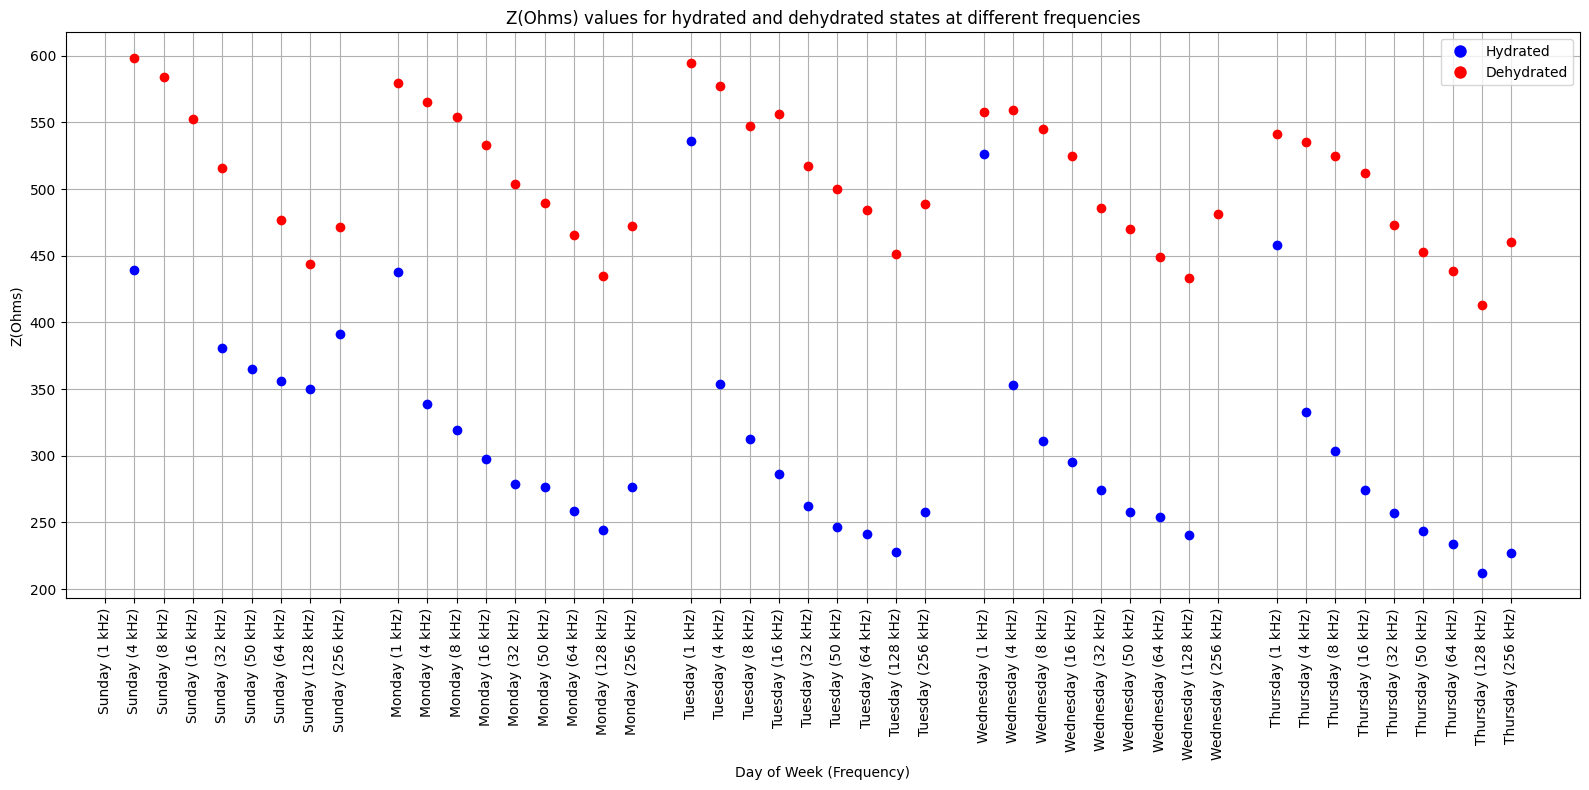

<Figure size 1600x800 with 0 Axes>

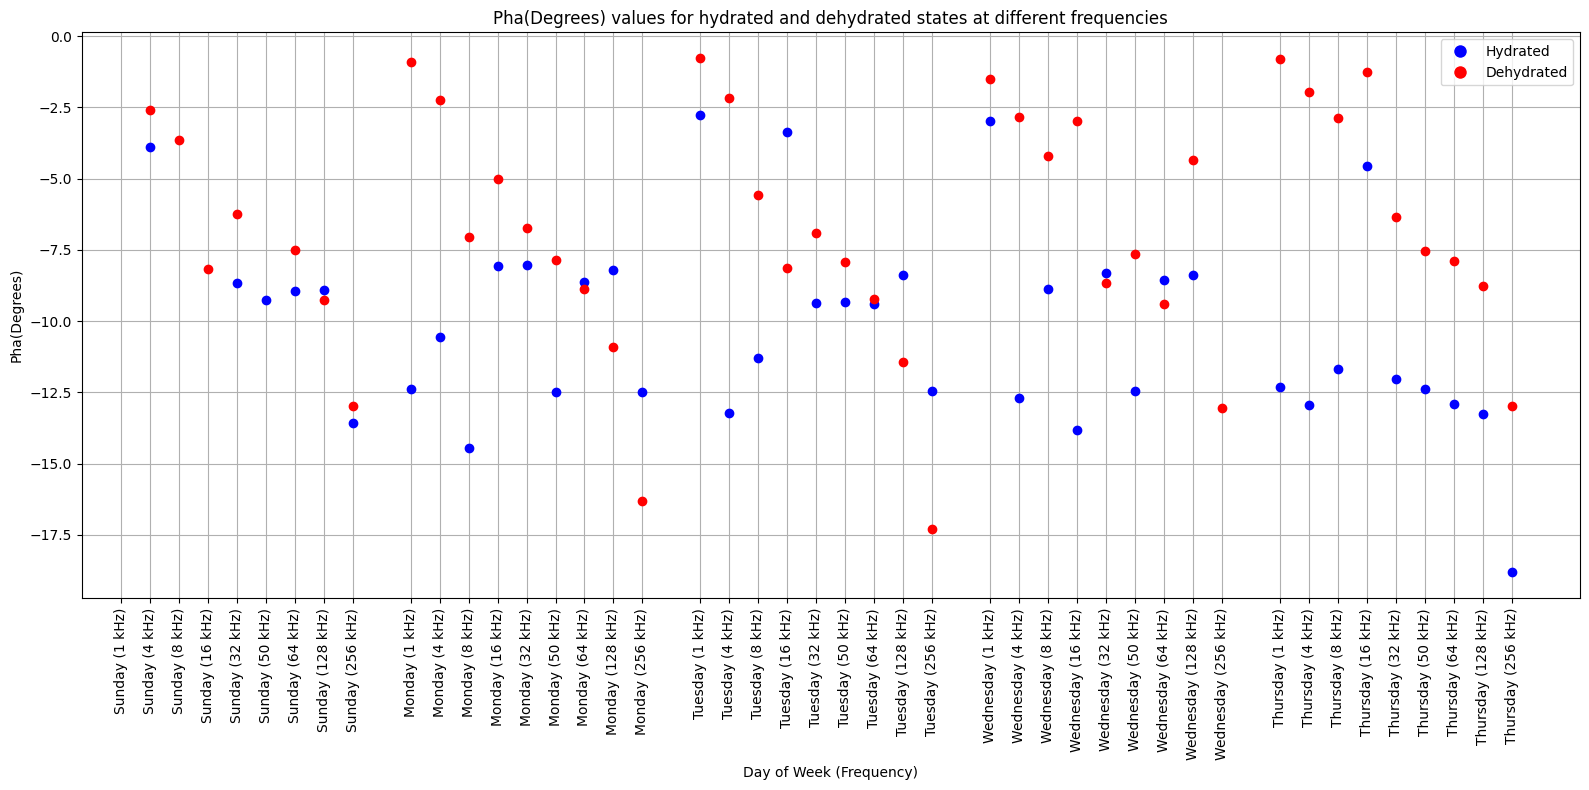

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the file into a DataFrame
file_path = '/content/drive/MyDrive/AquaCheck/MultiFreqWeekTestBIAData-Varsha.csv'
df = pd.read_csv(file_path)

# Separate the data for hydrated and dehydrated states
hydrated_data = df[df['Hydration State'] == 'Hydrated']
dehydrated_data = df[df['Hydration State'] == 'Dehydrated']

# Get unique frequencies and days of the week, sorted in ascending order
frequencies = sorted(df['Frequency(kHz)'].unique())
days_of_week = df['Day'].unique()

# Define the columns to plot
columns_to_plot = ['R(Ohms)', 'Xc(Ohms)', 'Z(Ohms)', 'Pha(Degrees)']

# Plot each column
for column in columns_to_plot:
    plt.figure(figsize=(16, 8))
    plt.subplots(figsize=(16, 8))

    for i, freq in enumerate(frequencies):
        for j, day in enumerate(days_of_week):
            hydrated_freq_day_data = hydrated_data[(hydrated_data['Frequency(kHz)'] == freq) & (hydrated_data['Day'] == day)]
            dehydrated_freq_day_data = dehydrated_data[(dehydrated_data['Frequency(kHz)'] == freq) & (dehydrated_data['Day'] == day)]

            # Calculate x position for each day within each frequency
            x_position = i + j * (len(frequencies) + 1)

            # Plot hydrated values if data is not empty
            if not hydrated_freq_day_data.empty:
                plt.plot(x_position, hydrated_freq_day_data[column], marker='o', linestyle='-', color='blue', label=f'Hydrated, {freq} kHz')
                #plt.plot(frequencies, interpolated_values, marker='o', linestyle='-', color=color, label=f'{subject}')
            # Plot dehydrated values if data is not empty
            if not dehydrated_freq_day_data.empty:
                plt.plot(x_position, dehydrated_freq_day_data[column], label=f'Dehydrated, {freq} kHz', marker='o', linestyle='-', color='red')

    # Set x-axis ticks and labels
    tick_locations = []
    tick_labels = []
    for j, day in enumerate(days_of_week):
        for i, freq in enumerate(frequencies):
            tick_locations.append(i + j * (len(frequencies) + 1))
            tick_labels.append(f'{day} ({freq} kHz)')
    plt.xticks(tick_locations, tick_labels, rotation=90)

    # Add labels and legend
    plt.xlabel('Day of Week (Frequency)')
    plt.ylabel(column)
    plt.title(f'{column} values for hydrated and dehydrated states at different frequencies')
    hydrated_legend = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10)
    dehydrated_legend = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10)
    plt.legend(handles=[hydrated_legend, dehydrated_legend], labels=['Hydrated', 'Dehydrated'])

    plt.grid(True)
    plt.tight_layout()
    plt.show()


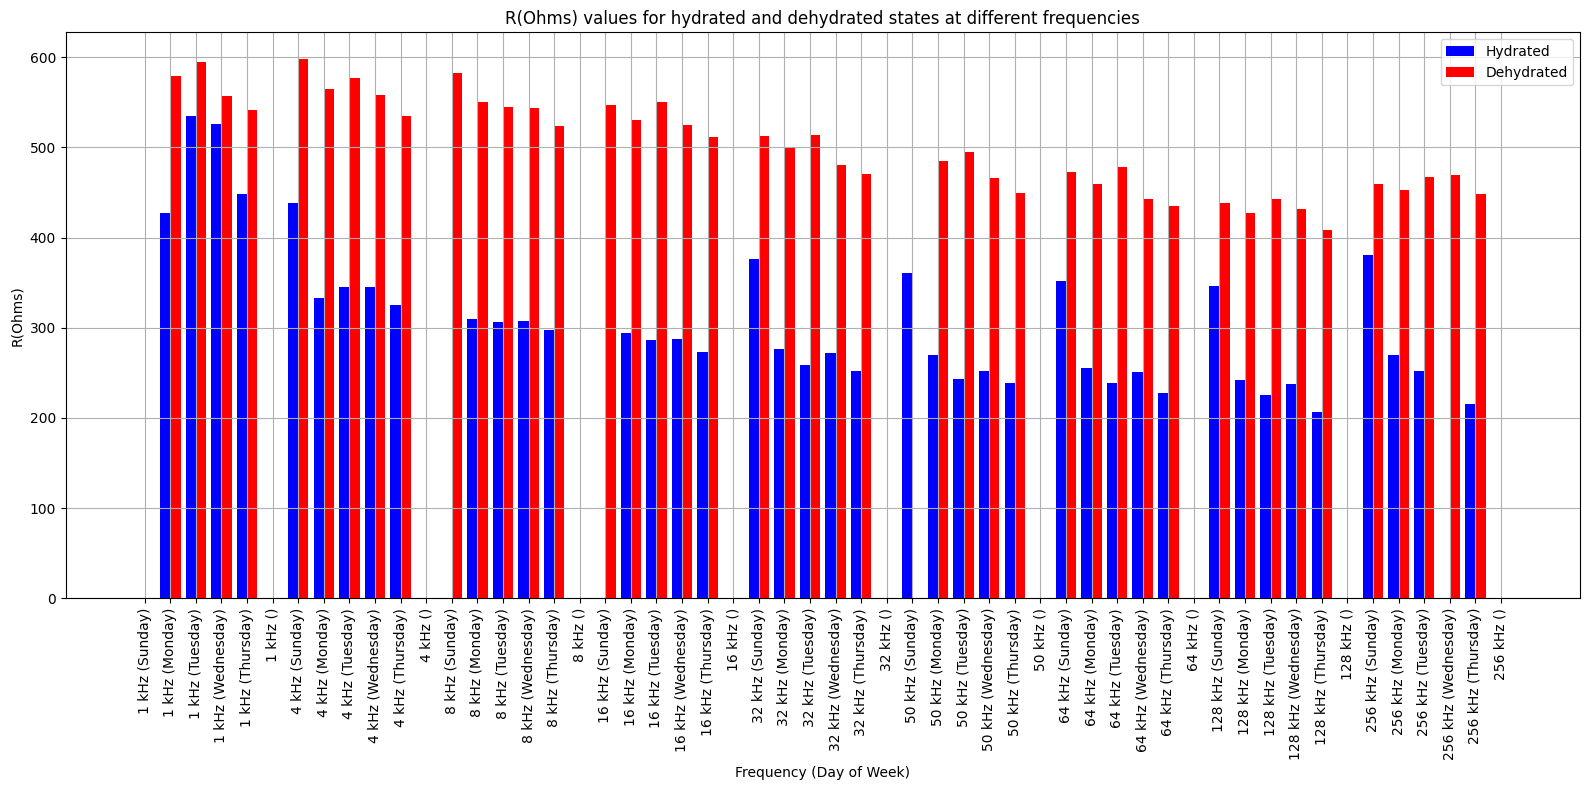

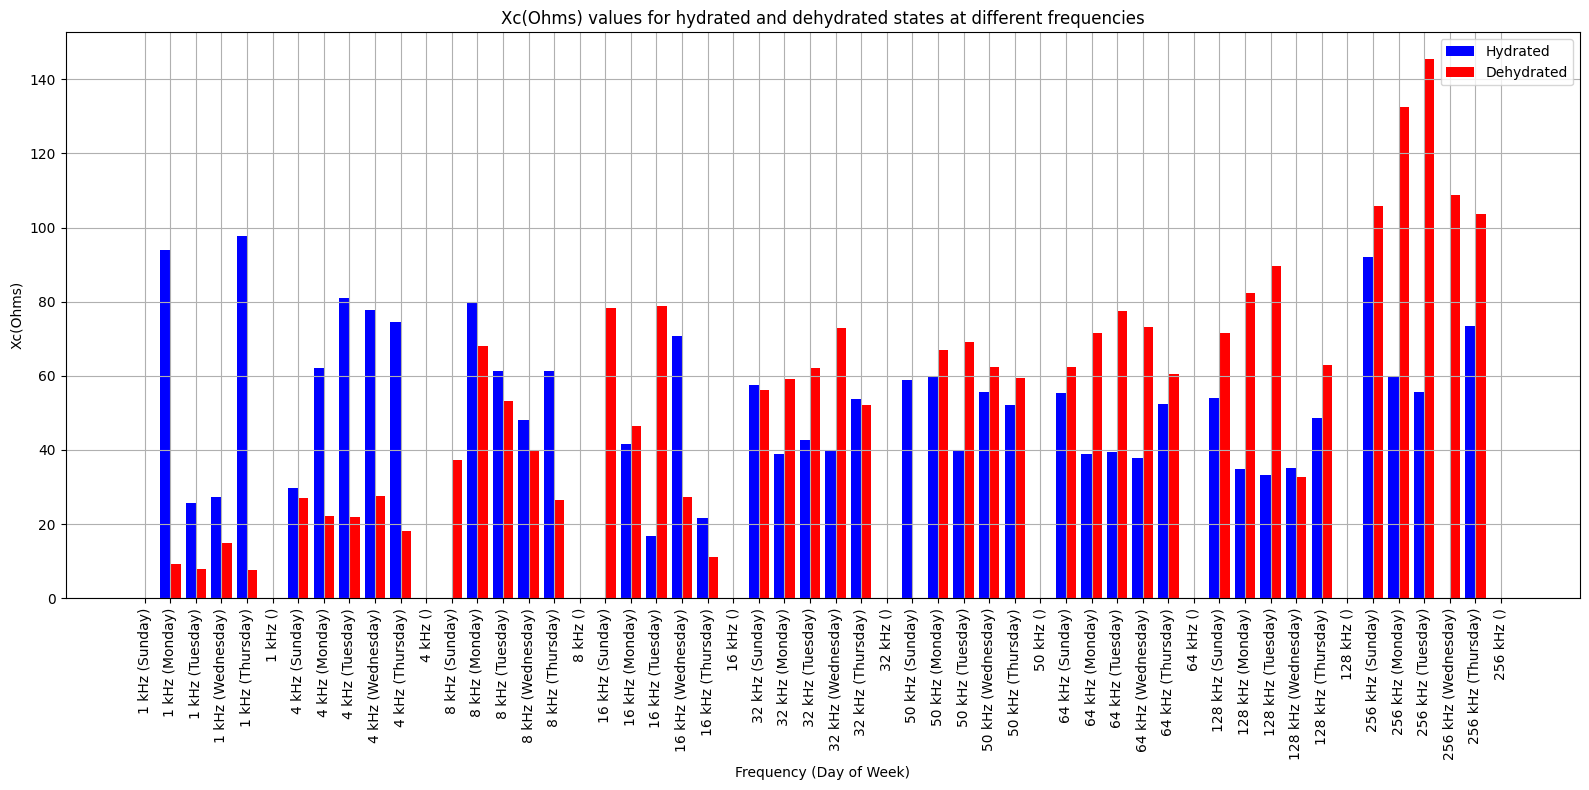

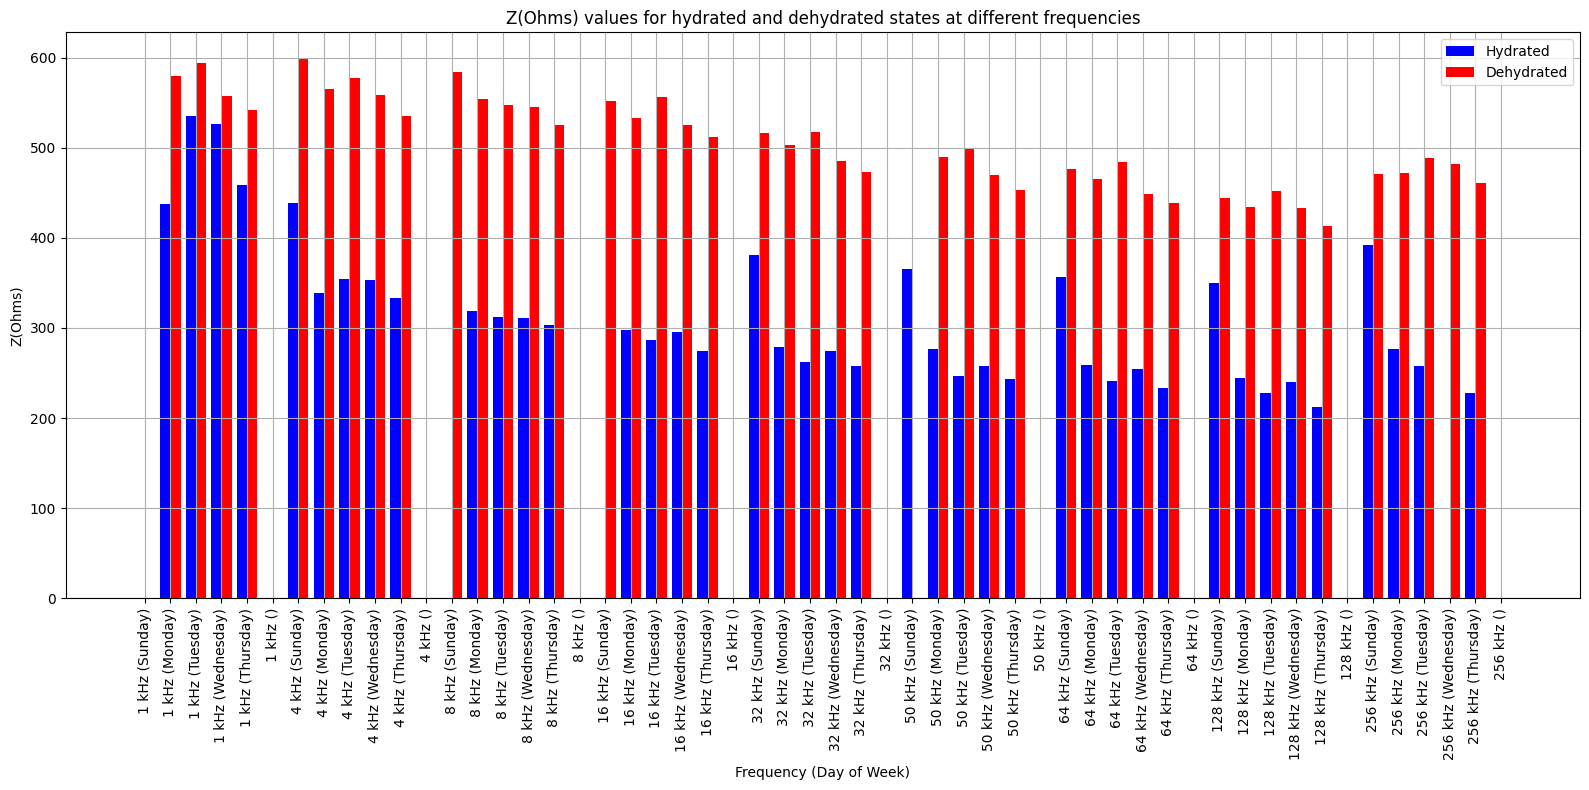

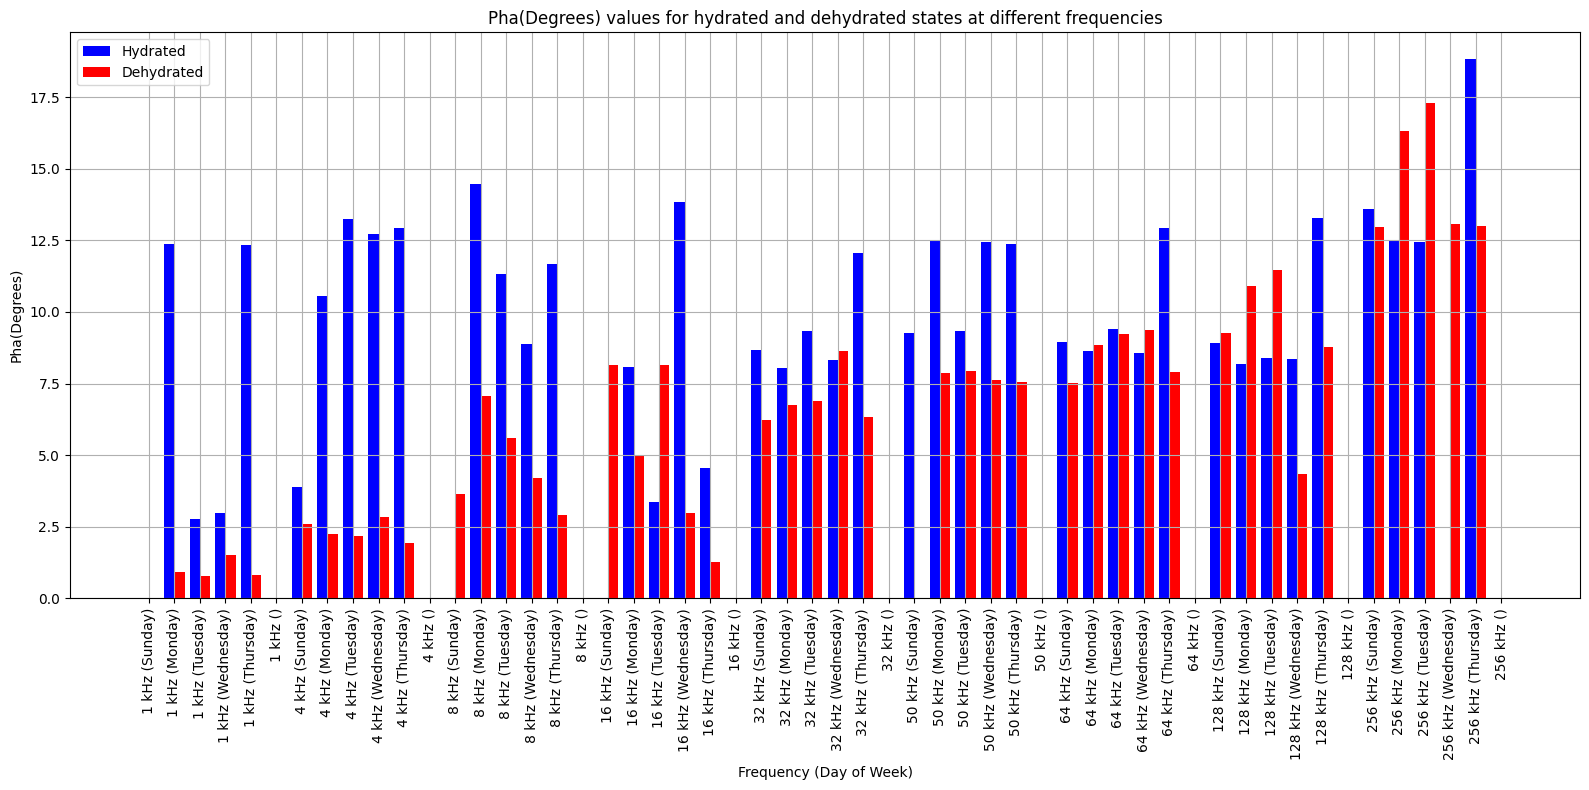

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the file into a DataFrame
file_path = '/content/drive/MyDrive/AquaCheck/MultiFreqWeekTestBIAData-Varsha.csv'
df = pd.read_csv(file_path)

# Define the frequencies and days of the week in ascending order
frequencies = [1, 4, 8, 16, 32, 50, 64, 128, 256]
days_of_week = ['Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', '']

# Define the columns to plot
columns_to_plot = ['R(Ohms)', 'Xc(Ohms)', 'Z(Ohms)', 'Pha(Degrees)']

# Generate x-axis labels in ascending order of frequency and days of the week
x_labels = []
x_positions = []
gap_size = 1 # Adjust the gap size as needed

# Generate x-axis labels and positions
for freq_index, freq in enumerate(frequencies):
    for day_index, day in enumerate(days_of_week):
        x_labels.append(f'{freq} kHz ({day})')
        x_positions.append((freq_index * len(days_of_week) + day_index) * gap_size)

# Plot bar charts for each column in columns_to_plot
for column in columns_to_plot:
    plt.figure(figsize=(16, 8))

    # Plot bars for each frequency
    for freq_index, freq in enumerate(frequencies):
        for day_index, day in enumerate(days_of_week):
            hydrated_data = df[(df['Hydration State'] == 'Hydrated') & (df['Frequency(kHz)'] == freq) & (df['Day'] == day)]
            dehydrated_data = df[(df['Hydration State'] == 'Dehydrated') & (df['Frequency(kHz)'] == freq) & (df['Day'] == day)]

            # Calculate the x position for the bar
            x_position = (freq_index * len(days_of_week) + day_index) * gap_size

            # Calculate the mean values for hydrated and dehydrated states
            hydrated_mean = hydrated_data[column].mean() if not hydrated_data.empty else 0
            dehydrated_mean = dehydrated_data[column].mean() if not dehydrated_data.empty else 0

            # Reverse the sign for Xc(Ohms) and Pha(Degrees)
            if column == 'Xc(Ohms)' or column == 'Pha(Degrees)':
                hydrated_mean *= -1
                dehydrated_mean *= -1

            # Plot the bar for hydrated data
            plt.bar(x_position - 0.2, hydrated_mean, width=0.4, label=f'Hydrated {freq} kHz', color='blue')

            # Plot the bar for dehydrated data
            plt.bar(x_position + 0.2, dehydrated_mean, width=0.4, label=f'Dehydrated {freq} kHz', color='red')

    # Set x-axis ticks and labels
    plt.xticks(x_positions, x_labels, rotation=90)

    # Add labels and legend
    plt.xlabel('Frequency (Day of Week)')
    plt.ylabel(column)
    plt.title(f'{column} values for hydrated and dehydrated states at different frequencies')
    plt.legend(['Hydrated', 'Dehydrated'])
    plt.grid(True)

    # Show the plot
    plt.tight_layout()
    plt.show()


In [ ]:
import pandas as pd
from tabulate import tabulate

# Read the CSV file
file_path = '/content/drive/MyDrive/AquaCheck/MultiFreqWeekTestBIAData-Varsha.csv'
data = pd.read_csv(file_path)

# Convert relevant columns to numeric if needed, handling errors gracefully
numeric_cols = ['R(Ohms)', 'Xc(Ohms)', 'Z(Ohms)', 'Pha(Degrees)']
for col in numeric_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Drop rows with non-numeric values in numeric columns
data = data.dropna(subset=numeric_cols)

# Get unique frequencies in the dataset and sort them in ascending order
unique_freqs = sorted(data['Frequency(kHz)'].unique())

# Initialize lists to store data for DataFrame creation
table_data = []
columns = ['Frequency(kHz)', 'Hydration State', 'Mean Z(Ohms)', 'Mean R(Ohms)', 'Mean Xc(Ohms)', 'Mean Pha(Degrees)']

# Calculate the mean for each specified column for each frequency, hydrated, and dehydrated
for freq in unique_freqs:
    freq_data = data[data['Frequency(kHz)'] == freq]
    for state in ['Hydrated', 'Dehydrated']:
        state_data = freq_data[freq_data['Hydration State'] == state]
        if len(state_data) > 0:  # Check if data exists for the state at this frequency
            mean_vals = {
                'Frequency(kHz)': freq,
                'Hydration State': state,
                'Mean Z(Ohms)': state_data['Z(Ohms)'].mean(),
                'Mean R(Ohms)': state_data['R(Ohms)'].mean(),
                'Mean Xc(Ohms)': state_data['Xc(Ohms)'].mean(),
                'Mean Pha(Degrees)': state_data['Pha(Degrees)'].mean()
            }
            table_data.append(mean_vals)

# Create a DataFrame from the collected data
result_table = pd.DataFrame(table_data, columns=columns)

# Sort the DataFrame by 'Frequency(kHz)' in ascending order
result_table.sort_values(by='Frequency(kHz)', inplace=True)

# Display the tabulated mean values using tabulate
table = tabulate(result_table, headers='keys', tablefmt='fancy_grid')
print(table)


╒════╤══════════════════╤═══════════════════╤════════════════╤════════════════╤═════════════════╤═════════════════════╕
│    │   Frequency(kHz) │ Hydration State   │   Mean Z(Ohms) │   Mean R(Ohms) │   Mean Xc(Ohms) │   Mean Pha(Degrees) │
╞════╪══════════════════╪═══════════════════╪════════════════╪════════════════╪═════════════════╪═════════════════════╡
│  0 │                1 │ Hydrated          │        489.476 │        483.956 │       -61.182   │            -7.60996 │
├────┼──────────────────┼───────────────────┼────────────────┼────────────────┼─────────────────┼─────────────────────┤
│  1 │                1 │ Dehydrated        │        568.364 │        568.269 │        -9.95744 │            -1.00717 │
├────┼──────────────────┼───────────────────┼────────────────┼────────────────┼─────────────────┼─────────────────────┤
│  2 │                4 │ Hydrated          │        363.674 │        357.022 │       -65.0272  │           -10.6633  │
├────┼──────────────────┼───────────────

In [ ]:
# Create a DataFrame from the collected data
result_table = pd.DataFrame(table_data, columns=columns)

# Calculate delta Z, delta R, delta Xc, and delta Pha
result_table['Delta Z'] = result_table.groupby('Frequency(kHz)')['Mean Z(Ohms)'].diff().abs()
result_table['Delta R'] = result_table.groupby('Frequency(kHz)')['Mean R(Ohms)'].diff().abs()
result_table['Delta Xc'] = result_table.groupby('Frequency(kHz)')['Mean Xc(Ohms)'].diff().abs()
result_table['Delta Pha'] = result_table.groupby('Frequency(kHz)')['Mean Pha(Degrees)'].diff().abs()

# Drop the first row of each frequency group since it doesn't have a delta value
result_table = result_table.dropna(subset=['Delta Z', 'Delta R', 'Delta Xc', 'Delta Pha'])

# Create a new DataFrame for delta values and frequency only
delta_table = result_table[['Frequency(kHz)', 'Delta R', 'Delta Xc', 'Delta Z', 'Delta Pha']]

# Display the tabulated delta values with frequency
delta_table_tabulated = tabulate(delta_table, headers='keys', tablefmt='fancy_grid')
print(delta_table_tabulated)

╒════╤══════════════════╤═══════════╤════════════╤═══════════╤═════════════╕
│    │   Frequency(kHz) │   Delta R │   Delta Xc │   Delta Z │   Delta Pha │
╞════╪══════════════════╪═══════════╪════════════╪═══════════╪═════════════╡
│  1 │                1 │   84.3129 │    51.2246 │   78.8883 │    6.60279  │
├────┼──────────────────┼───────────┼────────────┼───────────┼─────────────┤
│  3 │                4 │  209.532  │    41.6571 │  203.371  │    8.30637  │
├────┼──────────────────┼───────────┼────────────┼───────────┼─────────────┤
│  5 │                8 │  243.789  │    17.6329 │  239.262  │    6.90299  │
├────┼──────────────────┼───────────┼────────────┼───────────┼─────────────┤
│  7 │               16 │  247.745  │    10.6974 │  247.341  │    2.34674  │
├────┼──────────────────┼───────────┼────────────┼───────────┼─────────────┤
│  9 │               32 │  208.526  │    14.0313 │  208.439  │    2.31157  │
├────┼──────────────────┼───────────┼────────────┼───────────┼─────────────┤

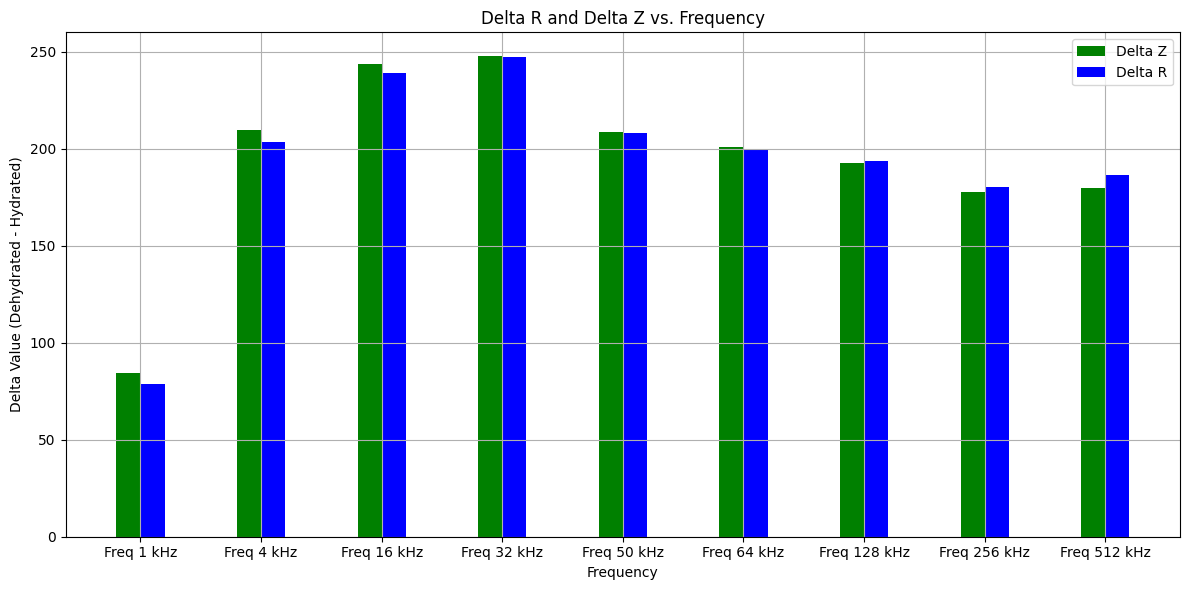

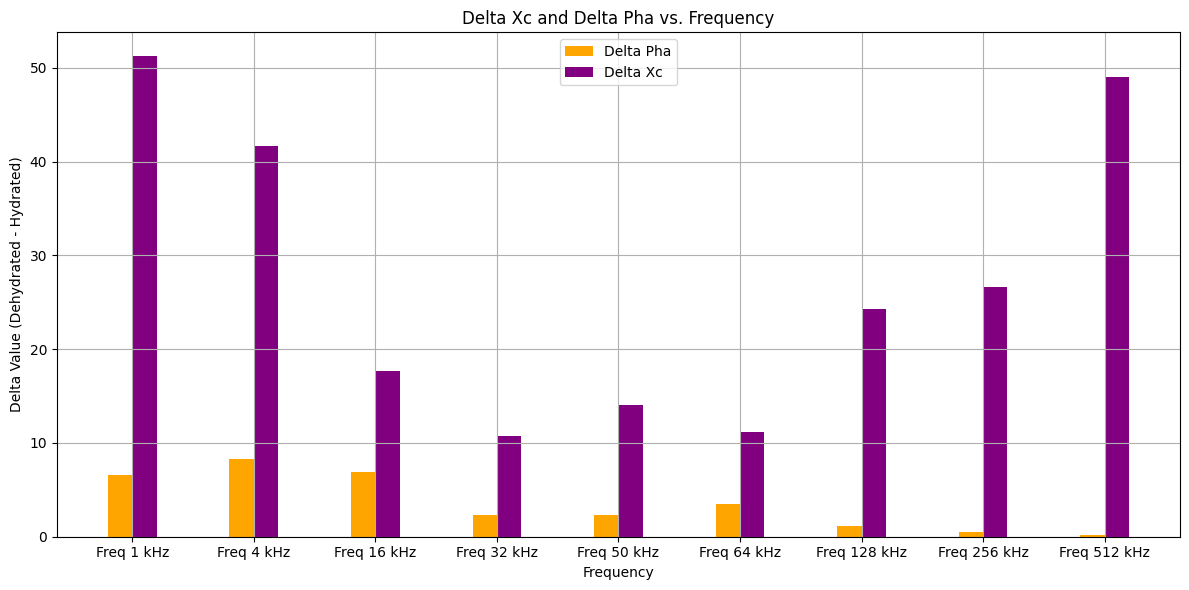

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming delta_table is the DataFrame with delta values and frequencies

# Splitting the data into two parts for each graph
delta_r_z = delta_table[['Frequency(kHz)', 'Delta R', 'Delta Z']]
delta_xc_pha = delta_table[['Frequency(kHz)', 'Delta Xc', 'Delta Pha']]

# Set x values for labeling
x_values = range(1, len(delta_table) + 1)

# Width of each bar group
bar_width = 0.2

# Plotting Delta R and Delta Z in one graph
plt.figure(figsize=(12, 6))

# Plot Delta R
plt.bar([x - bar_width/2 for x in x_values], delta_r_z['Delta R'], width=bar_width, align='center', label='Delta Z', color='green')

# Plot Delta Z
plt.bar([x + bar_width/2 for x in x_values], delta_r_z['Delta Z'], width=bar_width, align='center', label='Delta R', color='blue')

# Labeling x-axis
plt.xlabel('Frequency')
freq_values = [1, 4, 16, 32, 50, 64, 128, 256, 512]
plt.xticks(x_values, [f'Freq {freq} kHz' for freq in freq_values])
plt.ylabel('Delta Value (Dehydrated - Hydrated)')
plt.title('Delta R and Delta Z vs. Frequency')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Plotting Delta Xc and Delta Pha in another graph
plt.figure(figsize=(12, 6))

# Plot Delta Xc
plt.bar([x - bar_width/2 for x in x_values], delta_xc_pha['Delta Pha'], width=bar_width, align='center', label='Delta Pha', color='orange')

# Plot Delta Pha
plt.bar([x + bar_width/2 for x in x_values], delta_xc_pha['Delta Xc'], width=bar_width, align='center', label='Delta Xc', color='purple')

# Labeling x-axis
plt.xlabel('Frequency')
freq_values = [1, 4, 16, 32, 50, 64, 128, 256, 512]
plt.xticks(x_values, [f'Freq {freq} kHz' for freq in freq_values])
plt.ylabel('Delta Value (Dehydrated - Hydrated)')
plt.title('Delta Xc and Delta Pha vs. Frequency')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
